In [1]:
%matplotlib inline

  Absolute error in various numrical integration
 N        Trapezoidal                Simpson         
    2   4.6740110027233994e-01   3.5506593315177359e-01
    4   1.0605857509102945e-01   1.4388933302740048e-02
    8   2.5901493443758472e-02   8.1753377199844657e-04
   16   6.4379288801594825e-03   4.9925974373588033e-05
   32   1.6071553587448939e-03   3.1024817270797200e-06
   64   4.0164361940986382e-04   1.9362703507219692e-07
  128   1.0040183183956941e-04   1.2097350454709499e-08
  256   2.5099890947455350e-05   7.5601702675953675e-10
  512   6.2749372991000030e-06   4.7249759660417112e-11
 1024   1.5687321099910889e-06   2.9529712008979914e-12


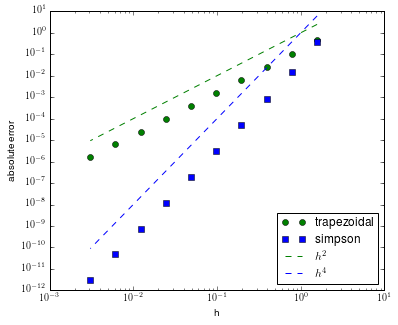

In [4]:
# %load problem03_1.py
#!/usr/bin/env python3
"""
%**************************************************************************
%*     Problem 3.1                                                        *
%*     filename: problem03_01.m                                           *
%*                                                                        *
%*  This program integrate sin(x) from x=0 to x=pi using rectangular,     *
%*  trapezoidal and simpson methods.  Absolute errors are plotted.        *
%*                                                                        *
%*     Programed by Ryoichi Kawai for Computational Physics Course.       *
%*     Last modification:  01/16/2017.                                    *
%**************************************************************************
"""
import numpy as np
import matplotlib.pyplot as plt

# Set the lower and upper bound of the integration
a=0.0
b=np.pi
exact=np.cos(b)+b*np.sin(b)-(np.cos(a)+a*np.sin(a));

h = np.zeros(10)
err_trap = np.zeros(10)
err_simp = np.zeros(10)
# Header of the output
print("  Absolute error in various numrical integration")
print("{0:^3s} {1:^24s} {2:^24s}".format('N','Trapezoidal','Simpson'))

# loop over different N
for k in range(0,10):
    N=2**(k+1)
    h[k]=(b-a)/N
    # evaluate the variable and function
    x = np.linspace(a,b,N+1)
    f = x*np.cos(x)
    
    # Trapezoidal rule
    trap=f[1:N].sum()*h[k] + (f[0]+f[N])*h[k]/2.0
    
    # Simpson rule
    simp=(f[0:N-1:2].sum()+4.0*f[1:N:2].sum()+f[2:N+1:2].sum())*h[k]/3.0
    
    # Evaluation of errors (the exat answer is 1)
    err_trap[k]=np.abs(exact-trap)
    err_simp[k]=np.abs(exact-simp)
    
    # print out the results
    print("{0:5d} {1:24.16e} {2:24.16e}".format(N,err_trap[k],err_simp[k]))
    
    del x; del f


# Order of the errors
h2=h**2
h4=h**4

# Plot the results
plt.ioff()
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics}')
plt.figure(figsize=(6,5))
plt.loglog(h,err_trap, 'og', label='trapezoidal')
plt.loglog(h,err_simp, 'sb', label='simpson')
plt.loglog(h,h2, '--g', label='$h^2$')
plt.loglog(h,h4, '--b', label='$h^4$')
plt.legend(loc=4)
plt.xlabel("h")
plt.ylabel("absolute error")
plt.show()
